<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


Text(0, 0.5, 'Median Dollar Value ($100K)')

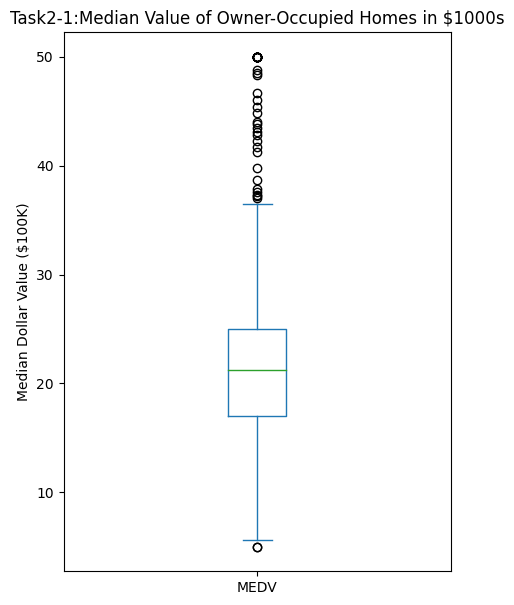

In [6]:
fig = plt.figure()
ax=fig.add_subplot()
boston_df['MEDV'].plot(kind='box',figsize=(5,7),title='Task2-1:Median Value of Owner-Occupied Homes in $1000s',ax=ax)
ax.set_ylabel('Median Dollar Value ($100K)')

In [7]:
medv_x = boston_df.groupby('CHAS').mean()['MEDV'].reset_index()
medv_x
medv_fig = pd.DataFrame(medv_x)

Text(0, 0.5, 'Median Dollar Value ($100K)')

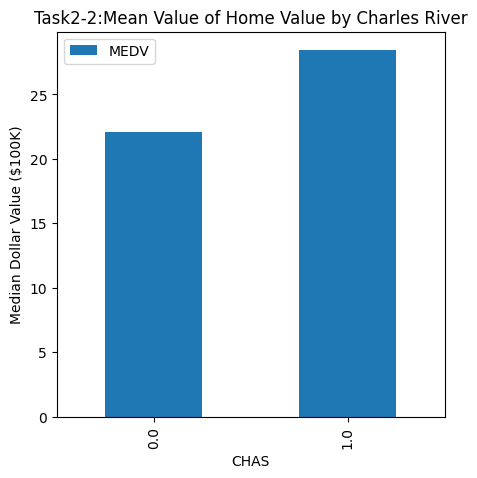

In [8]:
fig = plt.figure()
ax=fig.add_subplot()
medv_fig.plot(kind='bar',x='CHAS',figsize=(5,5),title='Task2-2:Mean Value of Home Value by Charles River',ax=ax)
ax.set_ylabel('Median Dollar Value ($100K)')

In [9]:
boston_df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

<AxesSubplot:ylabel='Frequency'>

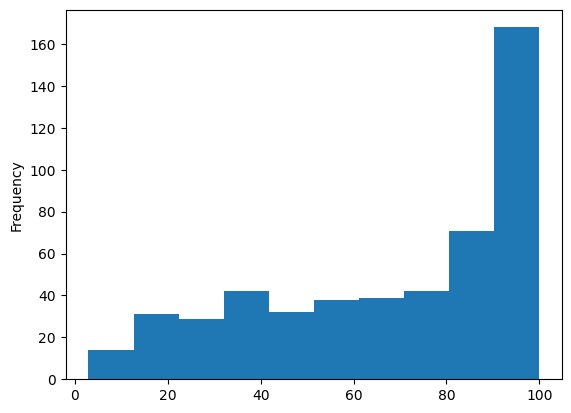

In [10]:
boston_df['AGE'].plot(kind='hist')

In [11]:
boston_df.loc[(boston_df['AGE'] < 35), 'age_group'] = '0< age <35'
boston_df.loc[(boston_df['AGE'] >= 35)&(boston_df['AGE'] < 70), 'age_group'] = '35 =< age <70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 =< age'

In [12]:
medv_by_age_gr = boston_df.groupby('age_group').mean()['MEDV']
df_medv_age = pd.DataFrame(medv_by_age_gr).reset_index()
df_medv_age

,age_group,MEDV
0,0< age <35,27.775824
1,35 =< age <70,24.947656
2,70 =< age,19.793380


Text(0, 0.5, 'Median Dollar Value ($100K)')

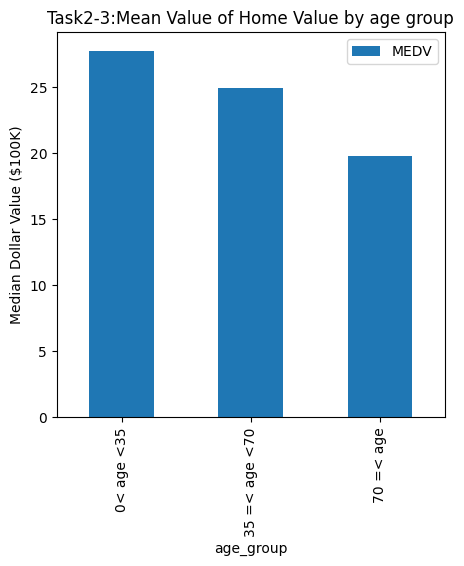

In [13]:
fig = plt.figure()
ax=fig.add_subplot()
df_medv_age.plot(kind='bar',x='age_group',figsize=(5,5),title='Task2-3:Mean Value of Home Value by age group',ax=ax)
ax.set_ylabel('Median Dollar Value ($100K)')

Text(0.5, 0, 'Nitric Oxide Concentration')

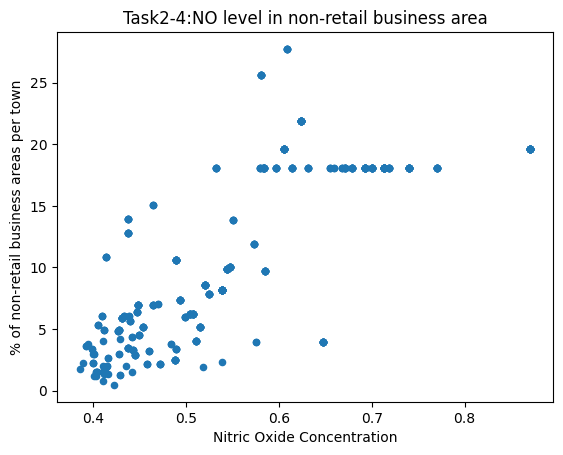

In [14]:
fig = plt.figure()
ax=fig.add_subplot()
boston_df.plot(kind='scatter', x='NOX', y='INDUS', ax=ax, title ='Task2-4:NO level in non-retail business area')
ax.set_ylabel('% of non-retail business areas per town')
ax.set_xlabel('Nitric Oxide Concentration')


Text(0.5, 0, 'Pupil-Teacher ratio by town')

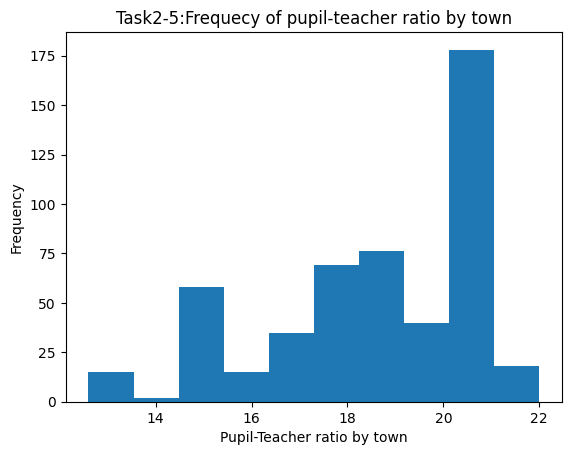

In [15]:
fig = plt.figure()
ax=fig.add_subplot()
boston_df['PTRATIO'].plot(kind='hist',ax=ax,title = 'Task2-5:Frequecy of pupil-teacher ratio by town')
ax.set_xlabel('Pupil-Teacher ratio by town')


In [22]:
#task3-1
x = boston_df['CHAS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           7.39e-05
Time:                        09:26:32   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion of task 3-1
#### independent sample t-test revealed that the houses bounded by the Charles river show significantly higher values than the ones not bounded by the river.
#### (t= 3.96, p <0.05)

In [30]:
# task 3-2
from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_group', data= boston_df).fit()
table=sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


### Conclusion of task 3-2
#### There is a significant effect of the age group on the median house value (F=36.4, p<0.05)

In [31]:
# task 3-3
x= boston_df['NOX']
y= boston_df['INDUS']
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           7.91e-98
Time:                        09:53:24   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion of task 3-3
#### There is a strong correlation between Nitric oxide level and non-retail business acres per town (r = 0.78, p<0.05)

In [32]:
# task 3-4
x= boston_df['DIS']
y = boston_df['MEDV']
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        09:59:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion of task 3-4
#### There is a significant impact of an additional weighted disance to the five Boston employment centres on the median value of owner occupies homes (F=33.58, p <0.05)